# **Clustering of timeseries data**

In [ ]:
import pandas as pd
dataset_url = 'https://raw.githubusercontent.com/neeharikasinghsjsu/cmpe255assignments/main/Clustering/dataset/f_timeseries_pretrained_model.csv'
sales_data = pd.read_csv(dataset_url)
sales_data.head()

,Unnamed: 0,Date,Sales
0,0,2021-10-01,29.109547
1,1,2021-10-02,30.720435
2,2,2021-10-03,30.305173
3,3,2021-10-04,27.390893
4,4,2021-10-05,22.841123


**Data preprocessing**

In [ ]:
# Check for missing values
missing_values = sales_data.isnull().sum()
print(missing_values)

# Summary statistics for detecting anomalies
summary_stats = sales_data.describe()
print(summary_stats)

Unnamed: 0    0
Date          0
Sales         0
dtype: int64
       Unnamed: 0       Sales
count  365.000000  365.000000
mean   182.000000   34.093942
std    105.510663    6.572683
min      0.000000   19.002444
25%     91.000000   29.290376
50%    182.000000   33.971567
75%    273.000000   38.647294
max    364.000000   48.190967


**Modeling**

In [ ]:
from sklearn.cluster import KMeans
# Reshape data for K-means
sales_values = sales_data['Sales'].values.reshape(-1, 1)

# Choose the number of clusters
n_clusters = 3

# Initialize and fit K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(sales_values)

# Add cluster information to the dataframe
sales_data['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Analysis and visualization**

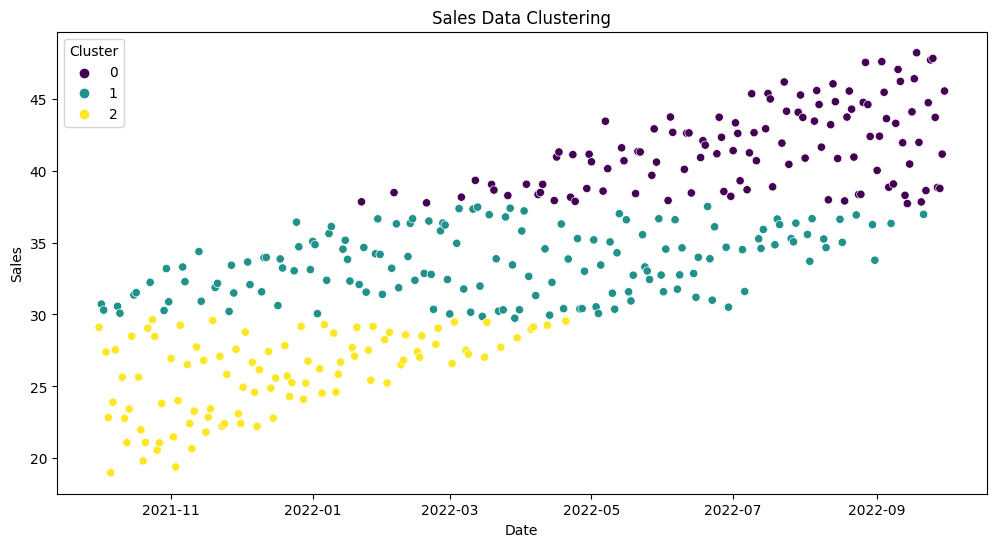

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Convert 'Date' to datetime for plotting
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Plotting the clustered data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date', y='Sales', hue='Cluster', data=sales_data, palette='viridis')
plt.title('Sales Data Clustering')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='Cluster')
plt.show()


In [21]:
# Calculate cluster characteristics
cluster_characteristics = sales_data.groupby('Cluster')['Sales'].agg(['mean', 'median', 'std'])

# Print cluster characteristics
print("Cluster Characteristics:")
print(cluster_characteristics)

# Calculate cluster distribution (count of data points in each cluster)
cluster_distribution = sales_data['Cluster'].value_counts().reset_index()
cluster_distribution.columns = ['Cluster', 'Count']

# Print cluster distribution
print("\nCluster Distribution:")
print(cluster_distribution)


Cluster Characteristics:
              mean     median       std
Cluster                                
0        41.660261  41.291078  2.857638
1        33.576996  33.671584  2.256868
2        25.855618  26.584967  2.798312

Cluster Distribution:
   Cluster  Count
0        1    152
1        0    116
2        2     97


Cluster 0:

This cluster exhibits the highest mean sales value at approximately $41.66. The median sales value is slightly lower at $41.29, indicating a relatively symmetric distribution. The standard deviation is moderate at approximately 2.86, suggesting that sales values in this cluster are relatively consistent.

Cluster 1:

This cluster has a mean sales value of approximately $33.58 and a median of $33.67. Both the mean and median are lower than Cluster 0, indicating lower sales values on average. The standard deviation is also lower at approximately 2.26, suggesting less variability in sales compared to Cluster 0.

Cluster 2:

This cluster has the lowest mean sales value at approximately $25.86 and a median of $26.58. The mean and median are substantially lower than the other clusters. The standard deviation is moderate at approximately 2.80, indicating moderate variability in sales values.